https://medium.com/swlh/understanding-customer-retention-rates-with-cohort-analysis-using-python-and-seaborn-5da6ea015935

In [ ]:
import os

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  
import pandas as pd
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/Users/Lorentz/PycharmProjects/001_Sales/005_Customer_Segmentation_guide/Sales_data/data.csv")
#df2 = pd.read_excel(url)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/10 8:26,3.39,17850.0,United Kingdom


In [2]:
"""
One of the easiest way to construct a cohort analysis is using pivot tables.
"""

'\nOne of the easiest way to construct a cohort analysis is using pivot tables.\n'

In [3]:
# Convert InvoiceDate from object to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [4]:
# --Group customers in acquisition cohorts based on the month they made their first purchase--

# Create function to truncate given date in column to a first day of the month
# def get_month(x): return dt.datetime(x.year, x.month, 1)

# Apply function to invoice date to invoice month column
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1)) #my way
# 1 is hardcoding.

grouping1 = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping1.transform('min')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-01,2011-08-01


In [5]:
"""
agg won't work here, as the df we want isn't yet a group by, so after running there will be lots of na.
"""
#df['CohortMonth2'] =df.groupby('CustomerID').agg({'InvoiceMonth': lambda y: y.min().date()})
#df

"\nagg won't work here, as the df we want isn't yet a group by, so after running there will be lots of na.\n"

In [6]:
"""
why grouping1 doesn't return an df?
grouping2 now returns a df, because it returns en equal-length series.
Notice "groupby menu" does not state a data frame is always produced, but a generalized data structure. 
"""
# This is only an ordinarily grouping.
grouping2 = df.groupby('CustomerID').agg({'InvoiceMonth': min})
grouping2

,InvoiceMonth
CustomerID,
12346.0,2011-01-01
12347.0,2010-07-01
12348.0,2010-12-01
12349.0,2011-11-01
12350.0,2011-02-01
...,...
18280.0,2011-07-01
18281.0,2011-12-01
18282.0,2011-02-01


In [7]:
"""
# when groupby doesn't return a df,
because if groupby customer ID, the length of InvoiceNo will be different, 
as some buys more frequently than then other.
"""
# to show individual gorup
grouping3 = df.groupby('CustomerID')
grouping3.get_group(18280.0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
111045,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-07-03 09:52:00,7.90,18280.0,United Kingdom,2011-07-01,2011-07-01
111046,545712,22180,RETROSPOT LAMP,2,2011-07-03 09:52:00,9.95,18280.0,United Kingdom,2011-07-01,2011-07-01
111047,545712,22467,GUMBALL COAT RACK,6,2011-07-03 09:52:00,2.55,18280.0,United Kingdom,2011-07-01,2011-07-01
111048,545712,22725,ALARM CLOCK BAKELIKE CHOCOLATE,4,2011-07-03 09:52:00,3.75,18280.0,United Kingdom,2011-07-01,2011-07-01
111049,545712,22727,ALARM CLOCK BAKELIKE RED,4,2011-07-03 09:52:00,3.75,18280.0,United Kingdom,2011-07-01,2011-07-01
111050,545712,22495,SET OF 2 ROUND TINS CAMEMBERT,6,2011-07-03 09:52:00,2.95,18280.0,United Kingdom,2011-07-01,2011-07-01
111051,545712,22358,KINGS CHOICE TEA CADDY,6,2011-07-03 09:52:00,2.95,18280.0,United Kingdom,2011-07-01,2011-07-01
111052,545712,22499,WOODEN UNION JACK BUNTING,3,2011-07-03 09:52:00,5.95,18280.0,United Kingdom,2011-07-01,2011-07-01
111053,545712,22611,VINTAGE UNION JACK SHOPPING BAG,3,2011-07-03 09:52:00,4.95,18280.0,United Kingdom,2011-07-01,2011-07-01
111054,545712,22084,PAPER CHAIN KIT EMPIRE,8,2011-07-03 09:52:00,2.95,18280.0,United Kingdom,2011-07-01,2011-07-01


In [8]:
# when groupby doesn't return a df
grouping3 = df.groupby('CustomerID')
grouping3.groups

{12346.0: Int64Index([61619, 61624], dtype='int64'),
 12347.0: Int64Index([ 14938,  14939,  14940,  14941,  14942,  14943,  14944,  14945,
              14946,  14947,
             ...
             535005, 535006, 535007, 535008, 535009, 535010, 535011, 535012,
             535013, 535014],
            dtype='int64', length=182),
 12348.0: Int64Index([ 34083,  34084,  34085,  34086,  34087,  34088,  34089,  34090,
              34091,  34092,  34093,  34094,  34095,  34096,  34097,  34098,
              34099,  70051,  70052,  70053,  70054,  70055,  70056, 146013,
             146014, 146015, 146016, 146017, 359058, 359059, 359060],
            dtype='int64'),
 12349.0: Int64Index([485502, 485503, 485504, 485505, 485506, 485507, 485508, 485509,
             485510, 485511, 485512, 485513, 485514, 485515, 485516, 485517,
             485518, 485519, 485520, 485521, 485522, 485523, 485524, 485525,
             485526, 485527, 485528, 485529, 485530, 485531, 485532, 485533,
             

In [9]:
# when groupby doesn't return a df
grouping3 

In [10]:
"""
so, grouping1 can't show df.

"""
grouping1.groups

{12346.0: Int64Index([61619, 61624], dtype='int64'),
 12347.0: Int64Index([ 14938,  14939,  14940,  14941,  14942,  14943,  14944,  14945,
              14946,  14947,
             ...
             535005, 535006, 535007, 535008, 535009, 535010, 535011, 535012,
             535013, 535014],
            dtype='int64', length=182),
 12348.0: Int64Index([ 34083,  34084,  34085,  34086,  34087,  34088,  34089,  34090,
              34091,  34092,  34093,  34094,  34095,  34096,  34097,  34098,
              34099,  70051,  70052,  70053,  70054,  70055,  70056, 146013,
             146014, 146015, 146016, 146017, 359058, 359059, 359060],
            dtype='int64'),
 12349.0: Int64Index([485502, 485503, 485504, 485505, 485506, 485507, 485508, 485509,
             485510, 485511, 485512, 485513, 485514, 485515, 485516, 485517,
             485518, 485519, 485520, 485521, 485522, 485523, 485524, 485525,
             485526, 485527, 485528, 485529, 485530, 485531, 485532, 485533,
             

In [11]:
grouping1.get_group(12348.0)

34083    2010-12-01
34084    2010-12-01
34085    2010-12-01
34086    2010-12-01
34087    2010-12-01
34088    2010-12-01
34089    2010-12-01
34090    2010-12-01
34091    2010-12-01
34092    2010-12-01
34093    2010-12-01
34094    2010-12-01
34095    2010-12-01
34096    2010-12-01
34097    2010-12-01
34098    2010-12-01
34099    2010-12-01
70051    2011-01-01
70052    2011-01-01
70053    2011-01-01
70054    2011-01-01
70055    2011-01-01
70056    2011-01-01
146013   2011-05-01
146014   2011-05-01
146015   2011-05-01
146016   2011-05-01
146017   2011-05-01
359058   2011-09-01
359059   2011-09-01
359060   2011-09-01
Name: InvoiceMonth, dtype: datetime64[ns]

In [12]:
print(df.describe())
print("\n")
print(df.info())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo       541909 non-null object
StockCode       541909 non-null object
Description     540455 non-null object
Quantity        541909 non-null int64
InvoiceDate     541909 non-null datetime64[ns]
UnitPrice       541909 non-null float64
CustomerID      406829 non-null float64
Country         541909 non-null object
InvoiceMonth    541909 non-null datetime64[ns]
CohortMonth     406829 non-null datetime64[ns]
dtypes: datet

In [13]:
df = df.dropna()

In [14]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo       406829 non-null object
StockCode       406829 non-null object
Description     406829 non-null object
Quantity        406829 non-null int64
InvoiceDate     406829 non-null datetime64[ns]
UnitPrice       406829 non-null float64
CustomerID      406829 non-null float64
Country         406829 non-null object
InvoiceMonth    406829 non-null datetime64[ns]
CohortMonth     406829 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 34.1+ MB
None


Next we will have to create our cohort index columns. First, let’s calculate the date difference 
between the first transaction and the next activity. We will create a function and apply it to our 
dataframe.

In [15]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# single underscore means ignore value.
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

In [16]:
invoice_year



0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceMonth, Length: 406829, dtype: int64

In [17]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month



In [18]:
df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,1


# Monthly Active Customers

In [31]:
grouping_count = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping_count['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')
cohort_counts


CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,98.0,9.0,4.0,NaN,7.0,7.0,4.0,10.0,10.0,5.0,...,38.0,40.0,36.0,44.0,41.0,37.0,41.0,44.0,40.0,23.0
2010-02-01,108.0,2.0,NaN,NaN,3.0,7.0,5.0,12.0,5.0,NaN,...,39.0,38.0,43.0,48.0,34.0,41.0,45.0,53.0,19.0,NaN
2010-03-01,49.0,NaN,1.0,1.0,1.0,2.0,5.0,NaN,NaN,14.0,...,23.0,16.0,19.0,19.0,13.0,24.0,23.0,9.0,NaN,NaN
2010-05-01,68.0,3.0,3.0,2.0,3.0,1.0,NaN,24.0,32.0,20.0,...,30.0,32.0,31.0,33.0,40.0,20.0,NaN,NaN,NaN,NaN
2010-06-01,76.0,2.0,4.0,4.0,1.0,NaN,26.0,29.0,25.0,25.0,...,27.0,33.0,26.0,39.0,5.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,53.0,2.0,2.0,1.0,NaN,9.0,24.0,22.0,22.0,19.0,...,22.0,20.0,29.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,87.0,3.0,2.0,NaN,30.0,37.0,30.0,34.0,33.0,36.0,...,41.0,49.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,83.0,1.0,NaN,23.0,29.0,20.0,30.0,23.0,29.0,26.0,...,32.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,38.0,NaN,11.0,15.0,12.0,15.0,18.0,8.0,14.0,11.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# --Calculate Retention Rate--

In [26]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100
retention.index = retention.index.strftime('%m-%Y')


we can do better by visualizing the results in seaborn. But before that, let’s calculate our average
quantity and price by cohort.


In [27]:
# --Calculate Average Quantity--
grouping_qty = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_qty = grouping_qty['Quantity'].mean()
cohort_data_qty = cohort_data_qty.reset_index()
average_quantity = cohort_data_qty.pivot(index='CohortMonth',
                                     columns='CohortIndex',
                                     values='Quantity')
average_quantity.index = average_quantity.index.strftime('%m-%Y')
# --Calculate Average Price--
grouping_price = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_price = grouping_price['UnitPrice'].mean()
cohort_data_price = cohort_data_price.reset_index()
average_price = cohort_data_price.pivot(index='CohortMonth',
                                     columns='CohortIndex',
                                     values='UnitPrice')
average_price.index = average_price.index.strftime('%m-%Y')

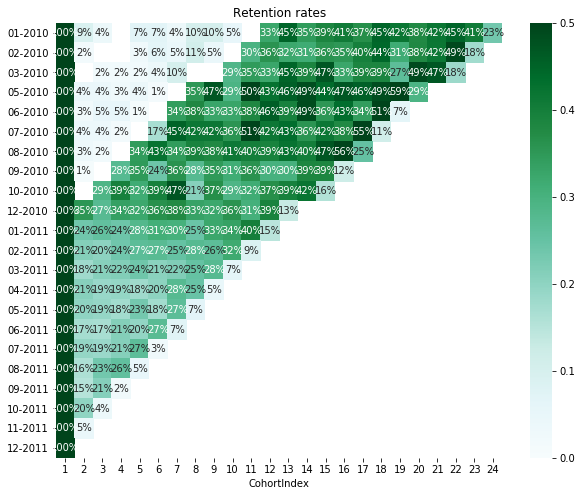

In [28]:
# --Plot heatmap using seaborn--
# Plot retention rates
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()

Note that the first column will always be 100% as it the total size of each cohort month. 
The distinct diagonal shape of the cohort heatmap shows that at the time of the data 
download (Dec 2011), only the first cohort (Dec 2010) would have had be able to make a 
purchase in their 13th month since their first transaction. This logic extends through 
to the rest of the cohorts. Notice in our Dec 2010 cohort, there is a spike in the our 
retention rate (50%). This could potentially indicate the seasonal shopping crowd.

there must be sth changed drastially in 2010, and going to 2011, it goes normal.

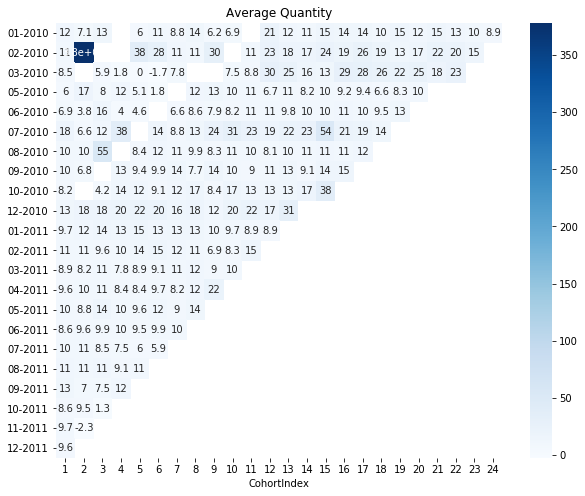

In [29]:
# Plot average quantity
plt.figure(figsize=(10, 8))
plt.title('Average Quantity')
sns.heatmap(data = average_quantity, annot=True, cmap='Blues')
plt.show()

Here, we can observe the average quantity of our cohorts. Interestingly, the customers 
that are retained in subsequent months purchase more products from the online store. 
That’s a good sign!

2010 shows similar pattern, but 2011 is more obvious.

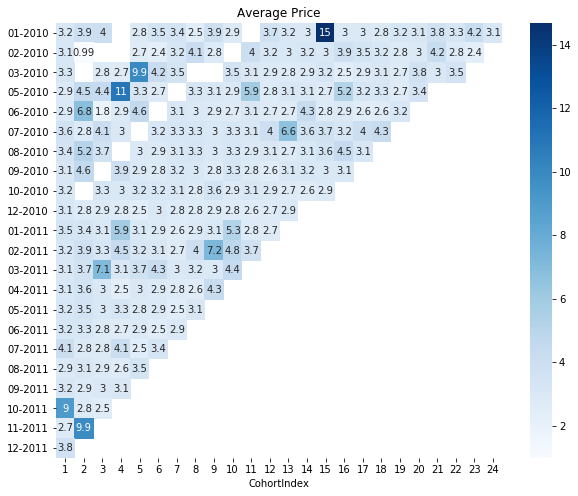

In [30]:
# Plot average price
plt.figure(figsize=(10, 8))
plt.title('Average Price')
sns.heatmap(data = average_price, annot=True, cmap='Blues')
plt.show()


While the average price of items purchased remains consistent or even becoming lower, 
there are some anomalies in our heatmap that are worth exploring. Could it be a particular 
marketing campaign launched during that period that sold higher priced products to our 
customers? If so, we should invest more in those campaigns!

## Conclusion
Cohort analysis is a powerful way to understand your customer retention and purchasing 
behavior overtime. As seen, it doesn’t require any machine-learning based algorithms, 
just some simple pivot tables. While this was done it Python, the logic can easily be 
extended to Excel or Google Sheets to create similar heatmaps from your data. Also, if 
you’re using Google Analytics, it is built into the platform! Here is an article on how 
you can leverage the power of cohort analysis in Google Analytics. Next time, we will take 
a look at another customer segmentation model, RFM. Stay tuned!
